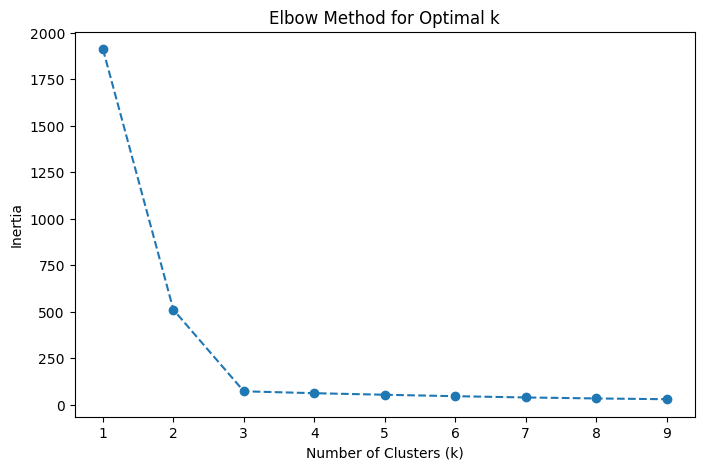

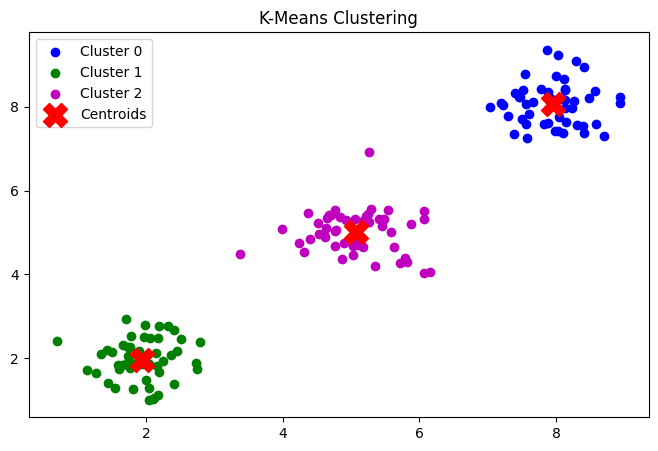

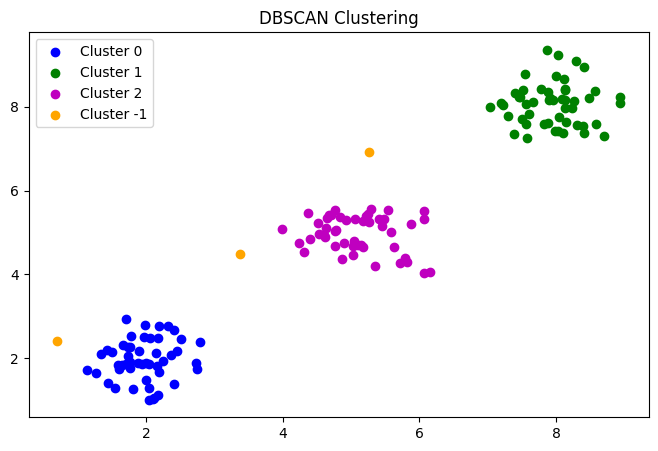

          x         y  kmeans_cluster  dbscan_cluster
0  2.248357  1.930868               1               0
1  2.323844  2.761515               1               0
2  1.882923  1.882932               1               0
3  2.789606  2.383717               1               0
4  1.765263  2.271280               1               0


In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN
from scipy.spatial.distance import cdist

# Generate synthetic data
np.random.seed(42)
data = np.vstack([
    np.random.normal(loc=[2, 2], scale=0.5, size=(50, 2)),
    np.random.normal(loc=[8, 8], scale=0.5, size=(50, 2)),
    np.random.normal(loc=[5, 5], scale=0.5, size=(50, 2))
])
df = pd.DataFrame(data, columns=['x', 'y'])

# K-Means clustering with optimal k
k_values = range(1, 10)
inertia = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df)
    inertia.append(kmeans.inertia_)

# Plot Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

# Apply K-Means with optimal k (assuming k=3 from elbow method observation)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df['kmeans_cluster'] = kmeans.fit_predict(df)

# Scatter plot for K-Means
plt.figure(figsize=(8, 5))
colors = ['b', 'g', 'm']
for i in range(3):
    cluster_data = df[df['kmeans_cluster'] == i]
    plt.scatter(cluster_data['x'], cluster_data['y'], color=colors[i], label=f'Cluster {i}')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='r', marker='X', label='Centroids')
plt.legend()
plt.title('K-Means Clustering')
plt.show()

# Apply DBSCAN
eps_value = 0.7
min_pts = 5
dbscan = DBSCAN(eps=eps_value, min_samples=min_pts)
df['dbscan_cluster'] = dbscan.fit_predict(df)

# Scatter plot for DBSCAN
plt.figure(figsize=(8, 5))
dbscan_labels = set(df['dbscan_cluster'])
colors = ['b', 'g', 'm', 'orange', 'k']
for i, label in enumerate(dbscan_labels):
    cluster_data = df[df['dbscan_cluster'] == label]
    plt.scatter(cluster_data['x'], cluster_data['y'], color=colors[i % len(colors)], label=f'Cluster {label}')
plt.title('DBSCAN Clustering')
plt.legend()
plt.show()

# Display DataFrame with cluster assignments
print(df.head())
